In [97]:

import os 
import numpy as np 


In [98]:
base_dir = '/Users/KU1247/Desktop/active_learning_code/code_to_submit/past_runs/'

In [99]:
file_name = 'performance_history.txt'

performance_active_all_runs = []

items = ['run1_active', 'run2_active', 'run3_active', 'run3_past_active', 'run4_active', 'run5_active']
# items = ['run2_active_mean', 'run3_active_mean', 'run4_active_mean']

for item in items: 
    folder_path = f'{base_dir}{item}/'
    full_path = os.path.join(folder_path, file_name)
    # Read the file back into a list of numbers
    with open(full_path, 'r') as file:
        content = file.read()  # Read the entire content of the file
        performance_active_all_runs.append([float(num) for num in content.split(',')])  # Split the string by commas and convert each to float

# Transpose the list of lists to get lists of all runs' performances per step
performance_per_step = list(map(list, zip(*performance_active_all_runs)))

# Calculate mean and variance using numpy
means_active = np.mean(performance_per_step, axis=1)
variances_active = np.var(performance_per_step, axis=1)

# plt.plot(means)

# plt.plot(variances)




In [100]:
file_name = 'performance_history.txt'

performance_passive_all_runs = []

items = ['run1_passive', 'run2_passive', 'run3_passive', 'run3_past_passive', 'run4_passive', 'run5_passive', 'run6_passive', 'run7_passive', 'run8_passive']
# items = ['run1_passive_mean', 'run1_passive_mean', 'run1_passive_mean']

for item in items: 
    folder_path = f'{base_dir}{item}/'
    full_path = os.path.join(folder_path, file_name)
    # Read the file back into a list of numbers
    with open(full_path, 'r') as file:
        content = file.read()  # Read the entire content of the file
        performance_passive_all_runs.append([float(num) for num in content.split(',')])  # Split the string by commas and convert each to float

# Transpose the list of lists to get lists of all runs' performances per step
performance_per_step = list(map(list, zip(*performance_passive_all_runs)))

# Calculate mean and variance using numpy
means_passive = np.mean(performance_per_step, axis=1)
variances_passive = np.var(performance_per_step, axis=1)

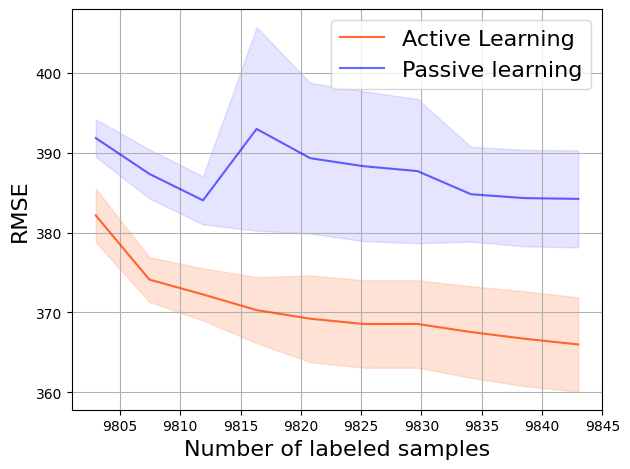

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# performance_passive = [389, 385]
# interpolated_values = np.linspace(performance_passive[0], performance_passive[1], 10)
# performance_passive = interpolated_values
# Example data
active_learning_performance = means_active # np.array(performance_active) #0.8 + np.sin(iterations / 200) / 10  # synthetic performance data
passive_learning_performance = means_passive # np.array(performance_passive)
iterations = np.linspace(9803, 9843, len(active_learning_performance))

variance_active = variances_active # 0.002 + 1 * np.cos(iterations / 200)  # synthetic variance data
# Convert variance to standard deviation
std_deviation_active = np.sqrt(variance_active)

variance_passive = variances_passive 
# Convert variance to standard deviation
std_deviation_passive = np.sqrt(variance_passive)

# Calculate the confidence interval (95% confidence interval for normal distribution)
confidence_interval_active =  std_deviation_active # *1.96

# Plot settings
fontsize = 16
# Using hex colors for precision
orange_color = '#FFA07A'  # A light orange color, similar to the one in your plot
dark_orange_color = '#FF4500'  # A darker orange color, for the line

# Random performance trend for comparison (just as an example, replace with your actual data)
confidence_interval_active = 0.5 *  std_deviation_active  # Assuming same CI calculation

plt.plot(iterations, active_learning_performance, label='Active Learning', color=dark_orange_color, alpha=0.8)
plt.fill_between(iterations, 
                 active_learning_performance - confidence_interval_active, 
                 active_learning_performance + confidence_interval_active, 
                 color=orange_color, alpha=0.3)  # Lighter shade of orange for confidence interval


# Random performance trend for comparison (just as an example, replace with your actual data)
confidence_interval_passive = 0.5 *   std_deviation_passive  # Assuming same CI calculation


# plt.figure(figsize=(10, 6))
plt.plot(iterations, passive_learning_performance, label='Passive learning', color='blue', alpha=0.6)
plt.fill_between(iterations, 
                 passive_learning_performance - confidence_interval_passive, 
                 passive_learning_performance + confidence_interval_passive, 
                 color='blue', alpha=0.1)

# Labeling and layout
# plt.title('Test F1 Score vs NumLabels', fontsize=fontsize)
plt.xlabel('Number of labeled samples', fontsize=fontsize)
plt.ylabel('RMSE', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid(True)

folder_path = f'{base_dir}'
# folder_path = '/Users/KU1247/Desktop/active_learning_code/run3_1'
file_name = 'result_numerical.pdf'

# Full path to the file
full_path = os.path.join(folder_path, file_name)

# Save and show the figure
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.savefig(full_path)  # Save the figure before plt.show()
plt.show()